# Homework: Logistic Regression to Predict Heart Disease
This notebook created for datai team homework. We have just learned logistic regression classification method to predict binary situations(ex:is cat or dog? tumor is malign or benign etc.)I try to implement this method in this notebook. I am new on machine learning so i can do some mistakes. Feel free to feedback. Greatly  Thanks.


# About Dataset:
I used this dataset in the link below :https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression
In this dataset we have some values like bmi, cigarette using, cigarette per day etc.  We will use this features to predict 10 year risk of coronary heart disease. First of all you can check dataset to normalize and uderstand it. We have to change some variables to binaries or, we have to delete null datas or we have to drop a column. For example, in dataset  we have education feature. Risk of coronary heart disease independent from education. Theese are not related features.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data_dir = "/kaggle/input/heart-disease-prediction-using-logistic-regression"

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




We did some inital processes and define direction of dataset. After this processes, we can create dataframe with pandas. After reading dataset,we have to clear some points on dataset.
1. First of All education feature is useless to predict  Risk of coronary heart disease. Drop it.
2. Male feature name is nonesense.Change to the Sex_male

In [ ]:
data = pd.read_csv(data_dir+"/framingham.csv")
data.drop(['education'],axis=1,inplace=True)
data.rename(columns={'male':'Sex_male'},inplace=True)
data.head()

In [ ]:
#Check dataset for missing values
data.isnull().sum()

When we check the dataset, we faced some missing values.This values affect negatively our approach so we must delete them.
dropna function return all NA values.Axis=0 representing rows.

In [ ]:
count = 0
for i in data.isnull().sum(axis=1):
    if i>0:
        count = count + 1
data.dropna(axis = 0 , inplace =True)
data.describe()

In [ ]:
#Check values again.
data.isnull().sum()

Now our dataset clear. We can implement logistic regression to it. First of all, Regression is a fitting a line to datas. We need x, and y axes to implement. Y axis is the data that we will predict. X axis is remain features. For this set, our y axis feature : TenYearCHD(10 year risk of coronary heart disease). Remain features will generate our x axis.

In [ ]:
print(data.info())
y = data.TenYearCHD.values
x_data = data.drop(["TenYearCHD"],axis = 1)


We have to normalize data. Because higher values can affect to lower values.

In [ ]:
#Normalize data
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

Split data as train end test. We will use sklearn to do. After splitting,transposition all matrixes to multiply.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


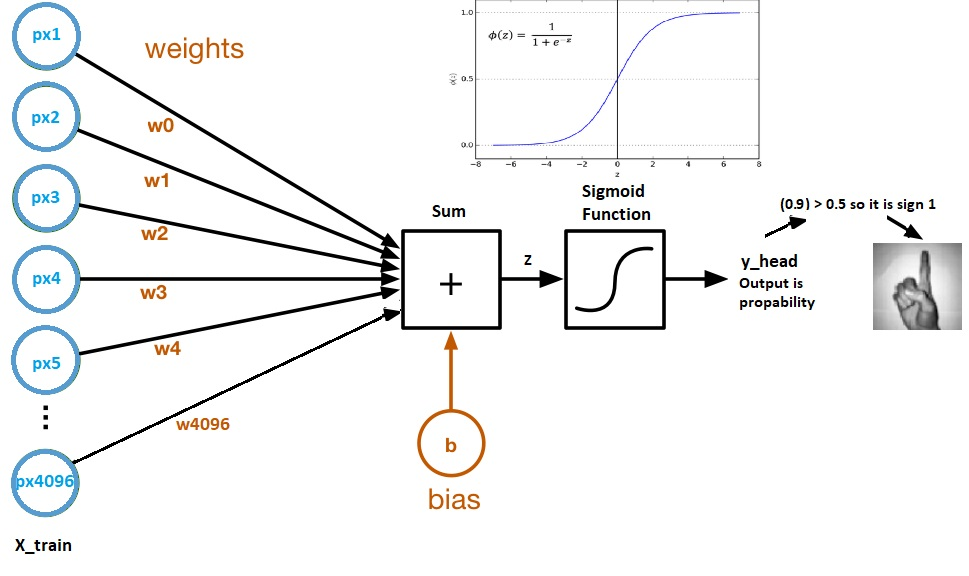
According to the datai team's deeplearning tutorials, Logistic regression model on picture. W's are, coefficents of each feature. Bias is intercept.

* z = (w.t)x + b => z equals to (transpose of weights times input x) + bias
* z = b + x1w1 + x2w2 + ... + xn*wn
* y_head = sigmoid(z)( we use sigmoid to  return probabilistic values)


Now our program steps:
1. Initialize Parameters
1. Define Sigmoid Function
1. Define and Implement Forward-Backward Propagation
1. Implement Update Function
1. Predict Function
1. Implement Logistic Regression
1. BONUS : Sklearn Logistic Regression



# 1. Initialize Parameters:
* In this section we define w,b. Our function get a parameter named dimension. This is our test and train matrix's(x_test,x_train) column number. For this dataset its 14.We create the matrix that contains 0.01. Initial w value is  0.01. It is only a concept.b = 0.0


In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension),0.01)
    b = 0.0
    return w,b

w,b = initialize_weights_and_bias(14) #For debugging.

# 2.Define Sigmoid Function:


Math Model of Sigmoid : 

In [ ]:
def sigmoid (z):
    y_head = 1/(1+np.exp(-z))
    return y_head
print(sigmoid(0)) #debug


# 3. Define and Implement Forward-Backward Propagation:
* This function implement forward and backward propagation. 1 forward and 1 backward propagation equals 1 iteration.
* First we multiply w's and x's. Sum of this process equals z. If we implement sigmoid function to the z we get y_head.
* After getting y_head, we need loss. After calculate loss, we need cost function. Cost function means sum of loss formulas results. This process is forward propagation.
* To calculate backward propagation(bp) we need derivatives of w's and b's.
* After calculated derivatives, we append them to the dictionary named gradients.
* In bp, we re-calculate w and b's to reduce cost function value. If our cost is too low, we can predict more accurate. This process can be done with better w and b values. When we calculate w and b we are use derivatives. Derivative means slope. If our slope is near 0,its done. This method named gradient descent.
**

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    
    z = np.dot(w.T,x_train) + b #•In tutorial we have learned fp's formula  z = W1X1+W2X2+....WnXn + bias(b). np.Dot does matrix multiplication
    y_head = sigmoid(z) # y_head means our predictions. We find this with sigmoid function. We implement it to the z.
    loss =-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) #loss function.
    cost = (np.sum(loss))/(x_train.shape[1]) # cost function is the sum of loss and divide by sample count.
    #now we will implement bp. in bp we need derivative of w's and b's
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients =gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost,gradients

# 4. Update Function :
* Our upadte function take parameters w,b(to update),x_train,y_train(to learn),learning_rate(hyperparameter so we have to tune.),number_of_iteration(how many times we will try?)
* We call fp and bp function, use new  w formula and do same things for b's. This formulas was explained in DataiTeams deep learning tutorial. You can find them on google.
* Every 10 iteration we print them to analyze.
* After all plot them with maplotlib.


In [ ]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

# 5. Predict Function
* When we splitted data set, we use 0.2 percent data to test,0.8 percent data to train. Now we will use this test datas(x_test) to predict some patients TenYearCHD situation.
* When i didnt use z.reshape(-1,1) method, i got an error that : tuple index out of range error. After  I check shapes w,and z so i decided to change them according to matrix multiply prequsities. If you have an explanation about this situation feel free to contact me. I need to clearly learn it.
* After i decide  threshold value as 0.5

In [ ]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    w = w.reshape(-1,1)
    b = b.reshape(-1,1)
    z = sigmoid(np.dot(w.T,x_test)+b)
    z= z.reshape(-1,1)
    print(w.shape)
    Y_prediction = np.zeros((1,x_test.shape[1]))

   
    # if z is bigger than 0.5, our prediction is TenYearsCHD 1 (y_head=1),
    # if z is smaller than 0.5, our prediction is TenYearsCHD 0 (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# 6. Logistic Regression
* Finally we define Logistic Regression function. First we will get datas dimensions (14 for our dataset).
* Initialize parameters(w,b) as w = 0.01, b=0.0
* Calculate new parameters,gradients and cost_lists. We can use update function because it has fp and bp already.
* Calculate prediction. This function gets w,b and test set.
* Call this function. You can change iteration and learning rate to analyze our model.


In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 14
    print(dimension)
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 5000)  

# 7. BONUS : Sklearn Logistic Regression:
* I know we did some effort to  predict something in this tutorial, but you can do this with sklearn with 4 lines of code :)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))  